<a href="https://colab.research.google.com/github/neamagalal/machine/blob/main/NLP_(5).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import re
import nltk
import numpy as np
import pandas as pd
import random
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
import nltk
from nltk.probability import FreqDist
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from urllib  import request
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

#from keras.preprocessing.text import Tokenizer
from collections import Counter
nltk.download('punkt')
nltk.download('gutenberg')

#get random books from gutnberg you can use this code to know the files 

partitions=[]
authors= [  'Jack London'  , ' H. Rider Haggard '  ,'David Widger','Baroness Orczy',  'Volunteer']
authors_label= {  'Jack London':1  , ' H. Rider Haggard ':2  ,'David Widger':3,'Baroness Orczy':4,  'Volunteer':5}
#books = [  'whitman-leaves.txt'  , 'shakespeare-hamlet.txt'  ,  'chesterton-brown.txt'  ,'austen-persuasion.txt', 'austen-sense.txt' ]

address=[]
books=[]
address.append('https://www.gutenberg.org/files/215/215-0.txt')
address.append('https://www.gutenberg.org/files/3155/3155-0.txt')
address.append('https://www.gutenberg.org/files/1257/1257-0.txt')
address.append('https://www.gutenberg.org/files/60/60-0.txt')
address.append('https://www.gutenberg.org/files/421/421-0.txt')


for i in address:
 books.append(request.urlopen(i).read().decode('utf8'))


for book in books:
#tokenizer forms tokens out of alphabetic sequences
#text = nltk.corpus.gutenberg.raw(books )
#use there list of books 
  words=nltk.word_tokenize(book)
  fdist = FreqDist(words)
  #print(fdist)
  #print(fdist.most_common(2))


#stop word
nltk.download('stopwords')
stop_words=set(stopwords.words("english"))
#print(stop_words)


#print("Filterd Sentence:",filtered_sents)
#fdist = FreqDist(filtered_sents)
#fdist.plot(30,cumulative=False)
#plt.show()

# creatpartition or record has 100 words
for author, book in zip(authors, books):
    words=nltk.word_tokenize(book)
    filtered_sents=[]
    for w in words:
      if w.lower() not in stop_words and w.isalnum() :
        filtered_sents.append(w)

    #filtered_sents =random.shuffle( filtered_sents)
    #print(filtered_sents)
    for h in range(200):
        randomm =  random.randint( 0 , len( filtered_sents)-100  )
        #each partition or record has 100 words
        partition_text = filtered_sents[ randomm : randomm+100 ]
        full_text = " ".join(partition_text)
        partitions.append([full_text,partition_text, author ,authors_label[author]])

#df = pd.DataFrame(sum(partitions, []), columns = ["Partitions", "Labels"])

#print(partitions)
#df = pd.DataFrame(  [[m , n ] for m, n in zip( partitions,author)])
#df=partition_text
#df.iloc[:,3]
df=pd.DataFrame(partitions,columns=['text','part'  ,'author' ,'label'])
#df.to_csv(  "file.csv"  )
#print(df)

#fdist.plot(30,cumulative=False)
#plt.show()


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\win\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package gutenberg to
[nltk_data]     C:\Users\win\AppData\Roaming\nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\win\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
df

,text,part,author,label
0,fished salmon broad stream emptied somewhere s...,"[fished, salmon, broad, stream, emptied, somew...",Jack London,1
1,crashed ground head chest last time rushed man...,"[crashed, ground, head, chest, last, time, rus...",Jack London,1
2,crying grief pain tried drive away whip paid h...,"[crying, grief, pain, tried, drive, away, whip...",Jack London,1
3,bank lazy eyes blinking fire sounds sights ano...,"[bank, lazy, eyes, blinking, fire, sounds, sig...",Jack London,1
4,prominently displaying sentence set forth para...,"[prominently, displaying, sentence, set, forth...",Jack London,1
...,...,...,...,...
995,say much name sir said think said strange natu...,"[say, much, name, sir, said, think, said, stra...",Volunteer,5
996,sermon Alan stood quite still tails clapping b...,"[sermon, Alan, stood, quite, still, tails, cla...",Volunteer,5
997,copies Project works provide accordance paragr...,"[copies, Project, works, provide, accordance, ...",Volunteer,5
998,Ardshiel power must tell King Factor upon seve...,"[Ardshiel, power, must, tell, King, Factor, up...",Volunteer,5


In [ ]:
X = df['text'] 
#y = df['label']
y = df['author']

In [ ]:
nltk.download('stopwords')
lst_stopwords = nltk.corpus.stopwords.words("english")
def utils_preprocess_text(text, flg_stemm=False, flg_lemm=True):#, lst_stopwords=None):
    ## clean (convert to lowercase and remove punctuations and characters and then strip)
    text = re.sub(r'[^\w\s]', '', str(text).lower().strip())
            
    ## Tokenize (convert from string to list)
    lst_text = text.split()
    ## remove Stopwords
    if lst_stopwords is not None:
        lst_text = [word for word in lst_text if word not in 
                    lst_stopwords]
                
    ## Stemming (remove -ing, -ly, ...)
    if flg_stemm == True:
        ps = nltk.stem.porter.PorterStemmer()
        lst_text = [ps.stem(word) for word in lst_text]
                
    ## Lemmatisation (convert the word into root word)
    if flg_lemm == True:
        lem = nltk.stem.wordnet.WordNetLemmatizer()
        lst_text = [lem.lemmatize(word) for word in lst_text]
            
    ## back to string from list
    text = " ".join(lst_text)
    return text

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\win\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
import nltk
nltk.download('wordnet')

df["text_clean"] = df["text"].apply(lambda x: utils_preprocess_text(x, flg_stemm=False, flg_lemm=True))#, lst_stopwords))
df.head()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\win\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


,text,part,author,label,text_clean
0,fished salmon broad stream emptied somewhere s...,"[fished, salmon, broad, stream, emptied, somew...",Jack London,1,fished salmon broad stream emptied somewhere s...
1,crashed ground head chest last time rushed man...,"[crashed, ground, head, chest, last, time, rus...",Jack London,1,crashed ground head chest last time rushed man...
2,crying grief pain tried drive away whip paid h...,"[crying, grief, pain, tried, drive, away, whip...",Jack London,1,cry grief pain tried drive away whip paid heed...
3,bank lazy eyes blinking fire sounds sights ano...,"[bank, lazy, eyes, blinking, fire, sounds, sig...",Jack London,1,bank lazy eye blinking fire sound sight anothe...
4,prominently displaying sentence set forth para...,"[prominently, displaying, sentence, set, forth...",Jack London,1,prominently displaying sentence set forth para...


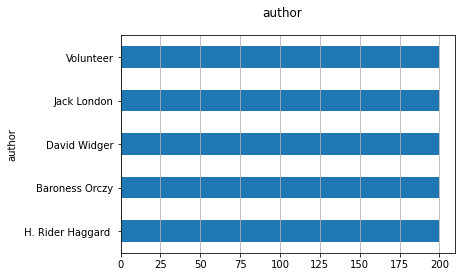

In [ ]:
## for plotting
import matplotlib.pyplot as plt
import seaborn as sns
import wordcloud

x = 'author'
fig, ax = plt.subplots()
fig.suptitle(x, fontsize=12)
df[x].reset_index().groupby(x).count().sort_values(by= 
       "index").plot(kind="barh", legend=False, 
        ax=ax).grid(axis='x')
plt.show()

In [ ]:
#tfidf split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.30, random_state=42)

print('Training Data Shape:', X_train.shape)
print('Testing Data Shape: ', X_test.shape)

Training Data Shape: (700,)
Testing Data Shape:  (300,)


In [ ]:
import matplotlib.pyplot as plt  
from sklearn.datasets import make_classification
from sklearn.metrics import plot_confusion_matrix

# SVm

svm bow

In [ ]:
#use pipeline to do BOW and clad=ssifier in the same time

from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier

svm_bow =Pipeline([
    ('vect', CountVectorizer()),
    ('clf', SGDClassifier(loss='hinge', penalty='l2',
                          alpha=1e-3, random_state=42,
                          max_iter=20, tol=None)),
])


svm_bow.fit(X_train, y_train) 
predictions =svm_bow.predict(X_test)

In [ ]:
svm_bow.score(X_test,y_test)



0.9666666666666667

In [ ]:
from sklearn import metrics
print(metrics.confusion_matrix(y_test,predictions))

[[71  0  0  0  0]
 [ 0 51  0  0  2]
 [ 0  3 52  2  0]
 [ 0  2  1 50  2]
 [ 1  1  2  0 60]]


                    precision    recall  f1-score   support

 H. Rider Haggard        0.99      1.00      0.99        71
    Baroness Orczy       0.89      0.96      0.93        53
      David Widger       0.95      0.91      0.93        57
       Jack London       0.96      0.91      0.93        55
         Volunteer       0.94      0.94      0.94        64

          accuracy                           0.95       300
         macro avg       0.95      0.94      0.94       300
      weighted avg       0.95      0.95      0.95       300

0.9466666666666667


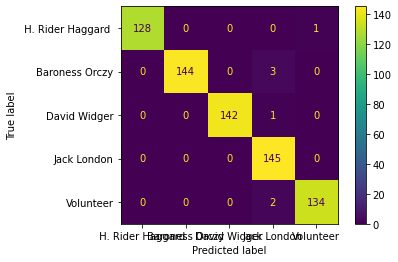

In [ ]:
print(metrics.classification_report(y_test,predictions))
print(metrics.accuracy_score(y_test,predictions))
plot_confusion_matrix(svm_bow,X_train,y_train)  
plt.show()

In [ ]:
svm_bow =Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', SGDClassifier(loss='hinge', penalty='l2',
                          alpha=1e-3, random_state=42,
                          max_iter=5, tol=None)),
])


svm_bow.fit(X_train, y_train)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf',
                 SGDClassifier(alpha=0.001, max_iter=5, random_state=42,
                               tol=None))])

In [ ]:
from sklearn.model_selection import GridSearchCV
parameters = {
    'vect__ngram_range':[(1, 1), (1, 2),(1,3)],
    #use tdidf or not
     'tfidf__use_idf':(True, False),
}#use it one cisionTree
gs_clf = GridSearchCV(svm_bow, parameters, cv=10, n_jobs=-4)

# Let's train with a smaller subset of the data:
gs_clf = gs_clf.fit(X_train, y_train)

In [ ]:
gs_clf.best_params_


{'tfidf__use_idf': True, 'vect__ngram_range': (1, 2)}

In [ ]:
gs_clf.score(X_test,y_test)


0.96

so GridSearch give us good accuracy , tfidf__use_idf: True, vect__ngram_range: (1, 1)

In [ ]:
from sklearn.model_selection import cross_val_score
#passing a cross validation iterator;
from sklearn.model_selection import ShuffleSplit
n_samples = X.shape[0]
# num split ,folds هنا افضل نتايج عن الي فوق كنت بستخدم الdefault
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
cross_val_score(svm_bow, X, y, cv=cv)

array([0.95333333, 0.92333333, 0.96666667, 0.95666667, 0.96      ])

# Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier


decisionTree_bow =Pipeline([
    #bow
    ('vect', CountVectorizer(ngram_range=(1,1))),
    #classifier
    ('clf', DecisionTreeClassifier(max_depth=100)),
])


decisionTree_bow.fit(X_train, y_train) 
predictions2 =decisionTree_bow.predict(X_test)

In [ ]:
decisionTree_bow.score(X_test,y_test)

0.8866666666666667

                    precision    recall  f1-score   support

 H. Rider Haggard        0.84      0.96      0.89        71
    Baroness Orczy       0.85      0.89      0.87        53
      David Widger       0.96      0.86      0.91        57
       Jack London       0.96      0.91      0.93        55
         Volunteer       0.85      0.81      0.83        64

          accuracy                           0.89       300
         macro avg       0.89      0.89      0.89       300
      weighted avg       0.89      0.89      0.89       300



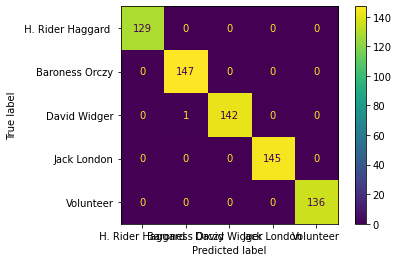

In [ ]:
print(metrics.classification_report(y_test,predictions2))
plot_confusion_matrix(decisionTree_bow,X_train,y_train)  
plt.show()



In [ ]:
decisionTree_tfidf =Pipeline([
    ('vect', CountVectorizer(ngram_range=(1,2))),
    ('tfidf', TfidfTransformer()),
    ('clf', DecisionTreeClassifier(max_depth=10)),
])


decisionTree_tfidf.fit(X_train, y_train)

predictions2 =decisionTree_tfidf.predict(X_test)

decisionTree_tfidf.score(X_test,y_test)

0.7466666666666667

In [ ]:
from sklearn.model_selection import GridSearchCV
parameters = {#vect ngram to show you one ngram,2,3ngram
    'vect__ngram_range': [(1, 1), (1, 2),(1,3)]#,
    #use tdidf or not
     #'tfidf__use_idf': (True, False),
}#use it one cisionTree
gs_clf = GridSearchCV(decisionTree_bow, parameters, cv=10, n_jobs=-4)

# Let's train with a smaller subset of the data:
gs_clf = gs_clf.fit(X_train, y_train)

In [ ]:
gs_clf.best_params_

{'vect__ngram_range': (1, 3)}

In [ ]:
gs_clf.score(X_test,y_test)

0.9033333333333333

In [ ]:
from sklearn.model_selection import cross_val_score
#passing a cross validation iterator;
from sklearn.model_selection import ShuffleSplit
n_samples = X.shape[0]
# num split ,folds هنا افضل نتايج عن الي فوق كنت بستخدم الdefault
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
cross_val_score(decisionTree_bow, X, y, cv=cv)



array([0.88      , 0.83666667, 0.87333333, 0.82666667, 0.86333333])

# Knn

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

KNeighbors_tfidf =Pipeline([
    #bow
    ('vect', CountVectorizer(ngram_range=(1,2))),
    #Tdfidf
    ('tfidf', TfidfTransformer()),
    ('clf', KNeighborsClassifier(n_neighbors=7)),
])


KNeighbors_tfidf.fit(X_train, y_train)
predictions3 =KNeighbors_tfidf.predict(X_test)
 

In [ ]:
KNeighbors_tfidf.score(X_test,y_test)

0.9533333333333334

                    precision    recall  f1-score   support

 H. Rider Haggard        1.00      0.96      0.98        71
    Baroness Orczy       0.88      0.96      0.92        53
      David Widger       0.98      0.91      0.95        57
       Jack London       0.96      0.93      0.94        55
         Volunteer       0.94      1.00      0.97        64

          accuracy                           0.95       300
         macro avg       0.95      0.95      0.95       300
      weighted avg       0.96      0.95      0.95       300



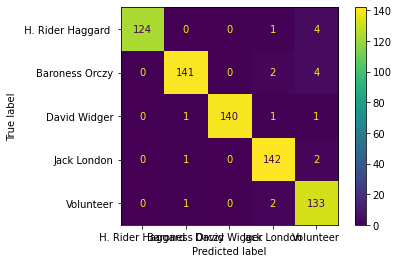

In [ ]:
print(metrics.classification_report(y_test,predictions3))
plot_confusion_matrix(KNeighbors_tfidf,X_train,y_train)  
plt.show()


In [ ]:
from sklearn.model_selection import GridSearchCV
parameters = {#vect ngram to show you one ngram,2,3ngram
    'vect__ngram_range': [(1, 1), (1, 2),(1,3)],
    #use tdidf or not
     'tfidf__use_idf': (True, False),
}#use it one cisionTree
gs_clf = GridSearchCV(KNeighbors_tfidf, parameters, cv=10, n_jobs=-4)

# Let's train with a smaller subset of the data:
gs_clf = gs_clf.fit(X_train, y_train)

In [ ]:
#knn give better accurracy when tfidf true,ngram unigram 0.94

gs_clf.best_params_

{'tfidf__use_idf': True, 'vect__ngram_range': (1, 1)}

In [ ]:
gs_clf.score(X_test,y_test)


0.9466666666666667

In [ ]:
from sklearn.model_selection import cross_val_score
#passing a cross validation iterator;
from sklearn.model_selection import ShuffleSplit
n_samples = X.shape[0]
# num split ,folds هنا افضل نتايج عن الي فوق كنت بستخدم الdefault
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
cross_val_score(KNeighbors_tfidf, X, y, cv=cv)

array([0.95666667, 0.95      , 0.96666667, 0.94666667, 0.94      ])

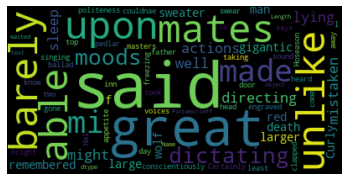

In [ ]:
# Create and generate a word cloud image:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
#matplotlib inline
#to get the same word with the same color
wordcloud = WordCloud().generate(str(X))

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()